# 3.데이터분석

In [121]:
# 필요 라이브러리 호출하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [122]:
# 데이터 호출하기
entry_data = pd.read_csv('/aiffel/data/entry_data.csv')
sales_data = pd.read_csv('/aiffel/data/sales_data.csv')
item_data = pd.read_csv('/aiffel/data/item_data.csv')
item_entry_data = pd.read_csv('/aiffel/data/item_entry_data.csv')

In [123]:
# entry_data 데이터 정보 확인하기
entry_data.head(5)

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [124]:
# sales_data 데이터 정보 확인하기
sales_data.head(5)

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [125]:
# item_data 데이터 정보 확인하기
item_data.head(5)

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [126]:
# item_entry_data 데이터 정보 확인하기
item_entry_data.head(5)

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


# 필수 문제1 : 월별 매출액 추세(sales_data를 이용합니다.)

In [127]:
# 문제 1: 월별 매출액 추세
# 하기활용할 데이터(sales_data)를 temp_var로 정의
temp_var = sales_data

# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = sales_data['결제일시'].str[:7]
temp_var
# temp_var.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN,2021-02


In [128]:
# sales_data의 결제금액에 포함된 쉼표(,) 지우기
 
temp_var['결제금액'] = temp_var['결제금액'].str.replace(',','').astype('int64')
# temp_var
# temp_var.head()

# sales_data의 결제금액을 숫자형태로 바꾸기
temp_var['결제금액'] = sales_data['결제금액'].astype('int64')
temp_var
# temp_var.info()
# temp_var의 payment열을 date 기준으로 집계하기

grouped = temp_var['결제금액'].groupby(temp_var['date']).sum()
grouped

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: 결제금액, dtype: int64

In [129]:
# payment_data
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
#한글사용
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=8)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)

'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

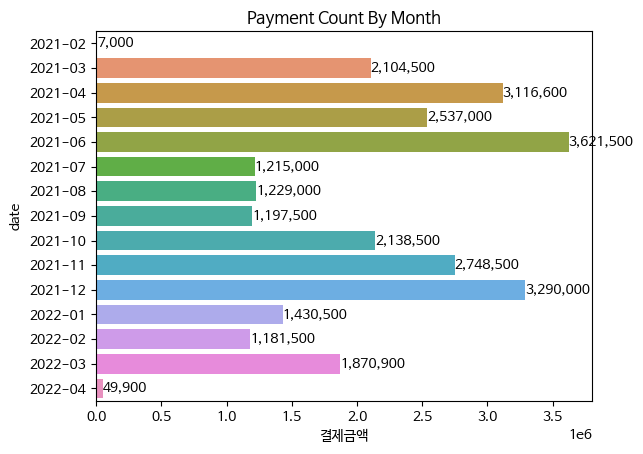

In [130]:
# 집계 결과를 시각화하기
# 문제 1: 월별 매출액 추세
ax = sns.barplot(data=grouped.reset_index(), x='결제금액', y='date') # 숫자가 커서 x축과 y축을 바꿈
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues])
plt.title('Payment Count By Month')
# plt.xticks(rotation=45) #근아님이 알려주신 각도 코드
# plt.figure(figsize=(12,5)) #성덕님이 알려주신 그래프 사이즈 설정 코드
plt.show()


# 필수 문제2: 가장 인기 있는 음식/음료(sales_data를 이용합니다.)

In [131]:
# 3.데이터분석# 문제 2: 가장 인기 있는 음식/음료
# temp_var의 상품명을 value_counts를 이용해 집계하기
# 주의! value_counts로 바로 집계하면 판매취소와 결제취소가 함께 집계됩니다.
# 따라서 '판매수량' 칼럼 값이 '-1'인 데이터를 제외하고 집계해야 합니다.
# 힌트 코드 : temp_var[temp_var['판매수량']==-1]
sold=sales_data[sales_data['판매수량'] == -1].index
sales_data.drop(sold, inplace=True)
sales_data
# import pandas as pd
# import numpy as np
# temp_var = sales_data

# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기

menu_list=temp_var['상품명'].value_counts()
menu_list.to_frame()

hot_menu_list = menu_list.reset_index().rename(columns = {"index":"상품명", "상품명":"판매수량"} )
hot=hot_menu_list.head(10) 
hot
# # 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
# import pandas as pd
# data = {
#     '판매수량' : [1204,749,455,420,314,312,309,284,246,242]
# }
# indexName = ['김치볶음밥','라면','짜장라면','치즈불고기볶음밥','계란추가','낙지볶음밥','새우볶음밥','아메리카노(ICE)','치즈감자튀김','감자튀김']
# menu_list = pd.DataFrame(data, index = indexName)


,상품명,판매수량
0,김치볶음밥,1204
1,라면,749
2,짜장라면,455
3,치즈불고기볶음밥,420
4,계란추가,314
5,낙지볶음밥,312
6,새우볶음밥,309
7,아메리카노(ICE),284
8,치즈감자튀김,246
9,감자튀김,242


In [132]:
hot_menu_list.head(10)

,상품명,판매수량
0,김치볶음밥,1204
1,라면,749
2,짜장라면,455
3,치즈불고기볶음밥,420
4,계란추가,314
5,낙지볶음밥,312
6,새우볶음밥,309
7,아메리카노(ICE),284
8,치즈감자튀김,246
9,감자튀김,242


In [133]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# plt.rc('font', family='NanumBarunGothic') 
# mpl.font_manager.findfont(font)
print("완료!")

완료!


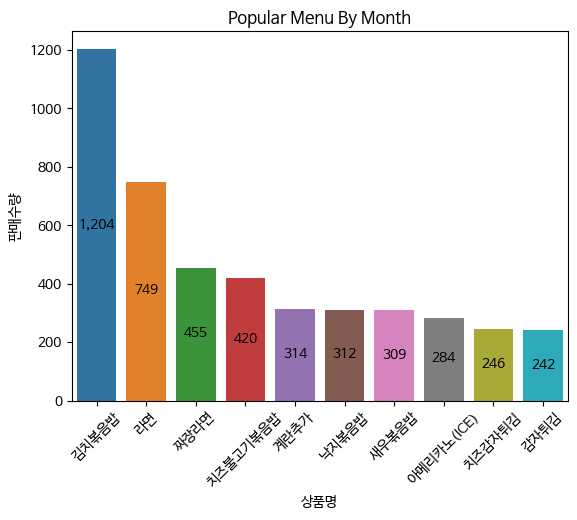

In [134]:
# 집계 결과를 시각화하기

ax = sns.barplot(data=hot, x='상품명', y='판매수량')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')

plt.title('Popular Menu By Month')
plt.xticks(rotation=45)
plt.show()

In [135]:
# temp_var의 payment열을 상품명을 기준으로 집계하기
grouped = temp_var['결제금액'].groupby(temp_var['상품명']).sum()

# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
item_payment=grouped.sort_values(ascending=False)
price = item_payment.head(10)
price

상품명
김치볶음밥         6004400
라면            2941500
치즈불고기볶음밥      2292600
짜장라면          2038500
낙지볶음밥         1710700
새우볶음밥         1539800
치즈감자튀김        1354200
감자튀김          1083800
아메리카노(ICE)    1058100
불닭볶음면          693000
Name: 결제금액, dtype: int64

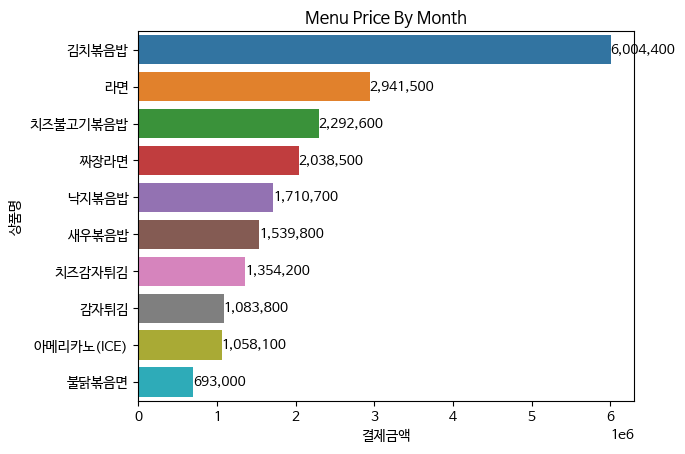

In [136]:
# 집계 결과 시각화하기

ax = sns.barplot(data=price.reset_index(), x='결제금액', y='상품명')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues])

plt.title('Menu Price By Month')
# plt.xticks(rotation=45)
plt.show()

 # 필수 문제3: 가장 많이 팔린 입장권 종류(entry_data를 이용합니다.)

In [137]:
# 문제 3: 가장 많이 팔린 입장권 종류
# 활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var = entry_data
# temp_var.info()

# temp_var의 금액을 숫자형태로 변환하기
temp_var['금액'] = temp_var['금액'].astype('int64')

# temp_var의 금액을 요금제명을 기준으로 집계하기
grouped = temp_var['금액'].groupby(temp_var['요금제명']).sum()
grouped

# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
tickets = grouped.sort_values(ascending=False)
tickets_hot = tickets.head(10)
tickets_hot

요금제명
한국대생 입장권(종일권)      70037000
입장권(종일권)           23570500
심야-조조무제한(06시까지)    11600000
심야-조조무제한            6221000
한국대생 무제한 입장권        5207500
시간요금제(1시간)          2665500
시간요금제(3시간)          2042000
무제한 입장권             1568600
18시이후 무제한           1330500
조조무제한                693000
Name: 금액, dtype: int64

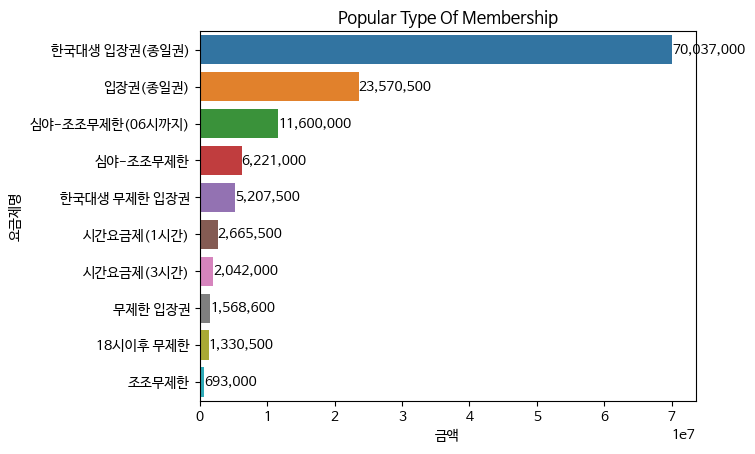

In [138]:
# 집계 결과 시각화하기
ax = sns.barplot(data=tickets_hot.reset_index(), x='금액', y='요금제명')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues])

plt.title('Popular Type Of Membership')
# plt.xticks(rotation=45)
plt.show()

# 모두카페에 그동안 숨겨져있던 진상 카공족은 누구인지 알아보기. 

- 1단계.고객별 총 이용시간 데이터프레임 만들기

In [139]:
# 필요 라이브러리 호출하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [140]:
# 데이터 호출하기
entry_data = pd.read_csv('/aiffel/data/entry_data.csv')
sales_data = pd.read_csv('/aiffel/data/sales_data.csv')
item_data = pd.read_csv('/aiffel/data/item_data.csv')
item_entry_data = pd.read_csv('/aiffel/data/item_entry_data.csv')

In [141]:
# entry_data 데이터 정보 확인하기
entry_data.head(5)

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [142]:
# sales_data 데이터 정보 확인하기
sales_data.head(5)

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [143]:
# item_data 데이터 정보 확인하기
item_data.head(5)

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [144]:
# item_entry_data 데이터 정보 확인하기
item_entry_data.head(5)

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


In [145]:
temp_var = entry_data

In [146]:
#이용시간 정보가 불일치하여 따로 추출
#이용시간을 퇴실시간에서 입실시간을 빼기 위해 데이터 타입 변경
temp_var['입실'] = temp_var['입실'].astype('datetime64')
temp_var['퇴실'] = temp_var['퇴실'].astype('datetime64')
temp_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   요금제명    22292 non-null  object        
 1   입실      22555 non-null  datetime64[ns]
 2   퇴실      22555 non-null  datetime64[ns]
 3   이용      22533 non-null  object        
 4   위치      22555 non-null  object        
 5   금액      22555 non-null  int64         
 6   구분      22555 non-null  object        
 7   고객      22555 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 1.4+ MB


In [147]:
temp_var['이용시간'] = temp_var['퇴실'] - temp_var['입실']
temp_var

,요금제명,입실,퇴실,이용,위치,금액,구분,고객,이용시간
0,시간요금제(1시간),2022-04-01 23:39:00,2022-04-02 00:39:00,오전 1:00:00,선불기2,3000,퇴실,customer263717,0 days 01:00:00
1,시간요금제(1시간),2022-04-01 23:39:00,2022-04-02 00:39:00,오전 1:00:00,선불기2,3000,퇴실,customer263717,0 days 01:00:00
2,무제한 입장권,2022-04-01 20:55:00,2022-04-01 21:41:00,오전 12:46:00,선불기2,7400,퇴실,customer247263,0 days 00:46:00
3,무제한 입장권,2022-04-01 20:55:00,2022-04-01 21:41:00,오전 12:46:00,선불기2,7400,퇴실,customer247263,0 days 00:46:00
4,한국대생 무제한 입장권,2022-04-01 19:54:00,2022-04-01 22:28:00,오전 2:33:00,선불기2,7400,퇴실,customer388928,0 days 02:34:00
...,...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09:00,2021-02-17 14:19:00,오전 1:10:00,선불기1,6500,퇴실,customer774105,0 days 01:10:00
22551,종일요금제,2021-02-17 13:09:00,2021-02-17 14:19:00,오전 1:10:00,선불기1,6500,퇴실,customer774105,0 days 01:10:00
22552,종일요금제,2021-02-17 13:06:00,2021-02-17 14:19:00,오전 1:13:00,선불기1,7000,퇴실,customer774105,0 days 01:13:00
22553,종일요금제,2021-02-17 13:06:00,2021-02-17 14:19:00,오전 1:13:00,선불기1,7000,퇴실,customer774105,0 days 01:13:00


In [148]:
#총 이용시간
vip = temp_var['이용시간'].groupby(temp_var['고객']).sum()
#데이터프레임으로 전환
vip_1 = vip.sort_values(ascending = False).to_frame()

In [149]:
vip_1 = vip_1.reset_index().rename(columns = {"index":"고객"})
vip_1 

,고객,이용시간
0,customer440840,44 days 21:40:00
1,customer667032,40 days 21:22:00
2,customer229550,33 days 10:12:00
3,customer666446,31 days 03:40:00
4,customer300766,29 days 03:44:00
...,...,...
5399,customer375207,0 days 00:07:00
5400,customer552852,0 days 00:04:00
5401,customer583524,0 days 00:04:00
5402,customer650846,0 days 00:03:00


- 2단계.고객별 총 결제금액 데이터프레임 만들기

In [150]:
# 필요 라이브러리 호출하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [151]:
# 데이터 호출하기
entry_data = pd.read_csv('/aiffel/data/entry_data.csv')
sales_data = pd.read_csv('/aiffel/data/sales_data.csv')
item_data = pd.read_csv('/aiffel/data/item_data.csv')
item_entry_data = pd.read_csv('/aiffel/data/item_entry_data.csv')

In [152]:
# entry_data 데이터 정보 확인하기
entry_data.head(5)

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [153]:
# sales_data 데이터 정보 확인하기
sales_data.head(5)

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [154]:
# item_data 데이터 정보 확인하기
item_data.head(5)

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [155]:
# item_entry_data 데이터 정보 확인하기
item_entry_data.head(5)

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


In [156]:
# sales_data의 결제금액에 포함된 쉼표(,) 지우기
temp_var = sales_data

temp_var['결제금액'] = temp_var['결제금액'].str.replace(',','').astype('int64')
# temp_var
# temp_var.head()

# sales_data의 결제금액을 숫자형태로 바꾸기
temp_var['결제금액'] = sales_data['결제금액'].astype('int64')
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507
...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN


In [157]:
vip_2 = sales_data['결제금액'].groupby(sales_data['고객']).sum()
# customer_payment

vip_2 = vip_2.sort_values(ascending = False).to_frame()
vip_2

,결제금액
고객,
customer667032,263500
customer499864,151300
customer977070,128800
customer859632,118500
customer581973,112500
...,...
customer314003,1500
customer843457,1500
customer425366,1000


In [158]:
#NaN 결측치 0으로 변환
# entry_vip_2= pd.DataFrame(vip_2)
# entry_vip_2 = entry_vip_2.replace(np.nan,0)
# entry_vip_2

3단계.이용시간과 결제금액 데이터프레임 합치기

In [159]:
entry_sales_sum = pd.merge(vip_1,vip_2, how='outer', on='고객' )
entry_sales_sum

,고객,이용시간,결제금액
0,customer440840,44 days 21:40:00,35000.0
1,customer667032,40 days 21:22:00,263500.0
2,customer229550,33 days 10:12:00,24500.0
3,customer666446,31 days 03:40:00,NaN
4,customer300766,29 days 03:44:00,6000.0
...,...,...,...
5560,customer551268,NaT,3000.0
5561,customer940650,NaT,1500.0
5562,customer836036,NaT,1500.0
5563,customer556195,NaT,1500.0


In [160]:
#이용시간 기준으로 내림차순으로 상위10명만 추출
entry_vip = entry_sales_sum.sort_values( by='이용시간', ascending=False ).head(20).reset_index(drop=True)
entry_vip_2 = entry_vip.head(10)
entry_vip_2

,고객,이용시간,결제금액
0,customer440840,44 days 21:40:00,35000.0
1,customer667032,40 days 21:22:00,263500.0
2,customer229550,33 days 10:12:00,24500.0
3,customer666446,31 days 03:40:00,NaN
4,customer300766,29 days 03:44:00,6000.0
5,customer258946,24 days 12:07:00,72500.0
6,customer338849,22 days 22:46:00,14000.0
7,customer490993,20 days 03:34:00,NaN
8,customer581973,19 days 20:38:00,112500.0
9,customer468231,16 days 13:00:00,NaN


In [161]:
#결제금액 기준으로 내림차순으로 상위10명만 추출
entry_vip_3 = entry_sales_sum.sort_values( by='결제금액', ascending=False ).head(20).reset_index(drop=True)
entry_vip_4 = entry_vip_3.head(10)
entry_vip_4

,고객,이용시간,결제금액
0,customer667032,40 days 21:22:00,263500.0
1,customer499864,NaT,151300.0
2,customer977070,5 days 10:01:00,128800.0
3,customer859632,2 days 04:22:00,118500.0
4,customer581973,19 days 20:38:00,112500.0
5,customer910882,2 days 15:34:00,110000.0
6,customer917331,5 days 15:30:00,108500.0
7,customer621866,8 days 22:32:00,106500.0
8,customer575860,NaT,102500.0
9,customer244232,2 days 12:00:00,95500.0


In [162]:
# payment_data
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=8)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)

'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

In [163]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# plt.rc('font', family='NanumBarunGothic') 
# mpl.font_manager.findfont(font)
print("완료!")

완료!


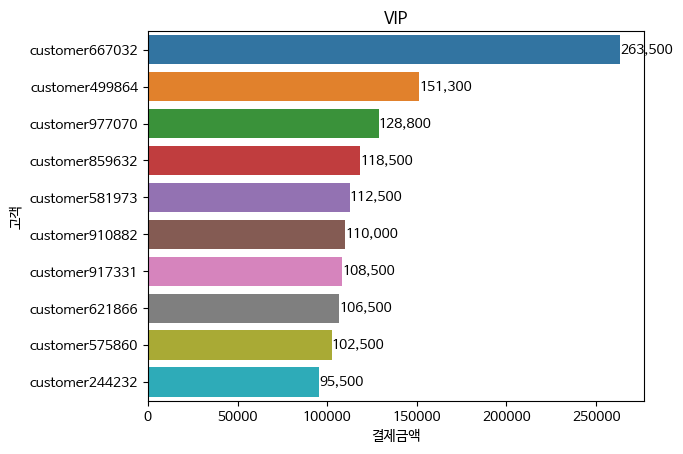

In [164]:
# 결제금액 결과 시각화하기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.barplot(data=entry_vip_4
                 .reset_index(), x='결제금액', y='고객')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues])

plt.title('VIP')
# plt.xticks(rotation=45)
plt.show()

<!-- 추가도전 -->

In [165]:
#이용시간 기준으로 내림차순으로 상위10명만 추출
entry_vip = entry_sales_sum.sort_values( by='이용시간', ascending=False ).head(20).reset_index(drop=True)
entry_vip_2 = entry_vip.head(10)
entry_vip_2

,고객,이용시간,결제금액
0,customer440840,44 days 21:40:00,35000.0
1,customer667032,40 days 21:22:00,263500.0
2,customer229550,33 days 10:12:00,24500.0
3,customer666446,31 days 03:40:00,NaN
4,customer300766,29 days 03:44:00,6000.0
5,customer258946,24 days 12:07:00,72500.0
6,customer338849,22 days 22:46:00,14000.0
7,customer490993,20 days 03:34:00,NaN
8,customer581973,19 days 20:38:00,112500.0
9,customer468231,16 days 13:00:00,NaN


In [166]:
#이용시간을 int64형식으로 변형
temp_var = entry_data

# 그래서 입실과 퇴실의 데이터타입을 dateti  me64으로 바꿔줌
temp_var['입실'] = temp_var['입실'].astype('datetime64')
temp_var['퇴실'] = temp_var['퇴실'].astype('datetime64')

# 이용시간 열을 새로 만들어 퇴실-입실을 값으로 넣어줌 
temp_var['이용시간'] = ( temp_var['퇴실'] - temp_var['입실'] ) / pd.Timedelta(hours=1)
temp_var.sort_values( by='이용시간', ascending=False )

entry_sum = temp_var['이용시간'].groupby( temp_var['고객'] ).sum().to_frame().reset_index().rename( columns = {"index":"고객"} )
entry_sum

,고객,이용시간
0,customer,23.783333
1,customer010407,4.950000
2,customer014003,16.900000
3,customer014109,1.333333
4,customer016604,10.800000
...,...,...
5399,customer999584,50.483333
5400,customer999585,2.450000
5401,customer999770,7.883333
5402,customer999973,4.083333


In [167]:
entry_sales_sum = pd.merge(entry_sum,vip_2, how='outer', on='고객' )
entry_sales_sum

,고객,이용시간,결제금액
0,customer,23.783333,NaN
1,customer010407,4.950000,NaN
2,customer014003,16.900000,NaN
3,customer014109,1.333333,NaN
4,customer016604,10.800000,NaN
...,...,...,...
5560,customer551268,NaN,3000.0
5561,customer940650,NaN,1500.0
5562,customer836036,NaN,1500.0
5563,customer556195,NaN,1500.0


In [168]:
item_payment=grouped.sort_values(ascending=False)
price = item_payment.head(10)
price

요금제명
한국대생 입장권(종일권)      70037000
입장권(종일권)           23570500
심야-조조무제한(06시까지)    11600000
심야-조조무제한            6221000
한국대생 무제한 입장권        5207500
시간요금제(1시간)          2665500
시간요금제(3시간)          2042000
무제한 입장권             1568600
18시이후 무제한           1330500
조조무제한                693000
Name: 금액, dtype: int64

In [169]:
# 데이터 호출하기
entry_data = pd.read_csv('/aiffel/data/entry_data.csv')
sales_data = pd.read_csv('/aiffel/data/sales_data.csv')
item_data = pd.read_csv('/aiffel/data/item_data.csv')
item_entry_data = pd.read_csv('/aiffel/data/item_entry_data.csv')

In [170]:
# entry_data 데이터 정보 확인하기
entry_data.head(5)

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [171]:
# sales_data 데이터 정보 확인하기
sales_data.head(5)

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [172]:
# item_data 데이터 정보 확인하기
item_data.head(5)

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [173]:
# item_entry_data 데이터 정보 확인하기
item_entry_data.head(5)

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


In [174]:
# sales_data의 결제금액에 포함된 쉼표(,) 지우기
temp_var = sales_data

temp_var['결제금액'] = temp_var['결제금액'].str.replace(',','').astype('int64')
# temp_var
# temp_var.head()

# sales_data의 결제금액을 숫자형태로 바꾸기
temp_var['결제금액'] = sales_data['결제금액'].astype('int64')
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507
...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN


In [175]:
#결제금액 기준으로 내림차순으로 상위10명만 추출
entry_vip_3 = entry_sales_sum.sort_values( by='결제금액', ascending=False ).head(20).reset_index(drop=True)
entry_vip_4 = entry_vip_3.head(10)
entry_vip_4

,고객,이용시간,결제금액
0,customer667032,981.366667,263500.0
1,customer499864,NaN,151300.0
2,customer977070,130.016667,128800.0
3,customer859632,52.366667,118500.0
4,customer581973,476.633333,112500.0
5,customer910882,63.566667,110000.0
6,customer917331,135.500000,108500.0
7,customer621866,214.533333,106500.0
8,customer575860,NaN,102500.0
9,customer244232,60.000000,95500.0


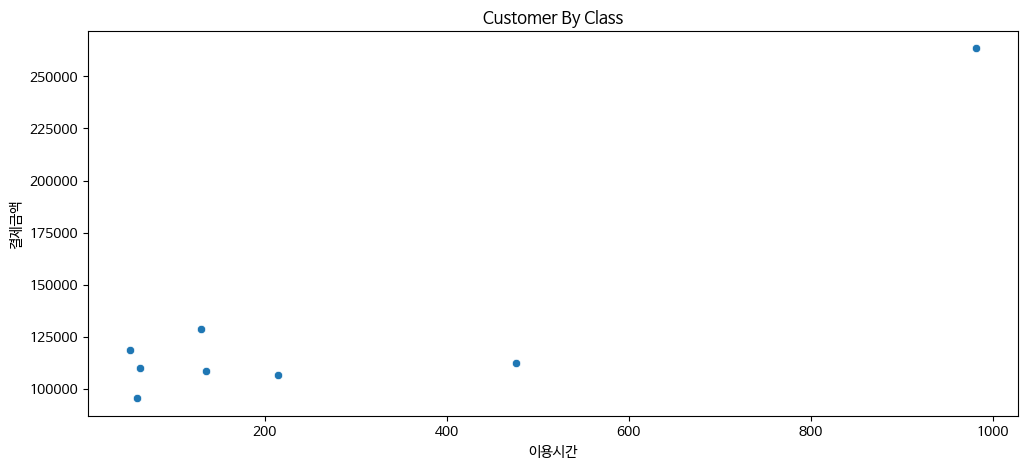

In [176]:
#이용시간이랑 결제금액으로 산포도 만들기
plt.figure(figsize=(12,5))
sns.scatterplot(data=entry_vip_4, x='이용시간', y='결제금액')
plt.title('Customer By Class')
plt.show()

# 회고

1. 문제  해결하였는가?
 문제를 모두 해결했다. 조원들과 정답을 공유하는 데 여러 가지 코드가 나왔고 접근방식 또한 다름을 확인할 수 있었다.
하지만, 결과는 같았고 훨씬 간결한 코드들도 확인할 수 있었다. 사람마다 성향이 다른 것처럼 코드에 옷을 입혀주는 것 또한 달라서 정말 재밌는 시간을 보낼 수 있었다.

2. 프로젝트를 통해 해결하고 싶은 문제를 정의하였는가?
해결하고 싶은 문제는 최종적으로 고객마다 결제금액과 이용 시간을 색상으로 구현하여 히트맵을 만들어보고 싶었지만 잘 나오지 않아 많은 그래프 형식으로 도전해볼 생각이다.

3. 내가 정의한 문제를 해결하려고 하였고 적절한 결과를 도출하였는가?
스터디카페에서 숨은 카공족들이 얼마나 있나 궁금했는데 코드로 찾아내고 그래프까지 구현할 수 있었다.


숨은 진상 카공족들이 얼마나 있으려나 궁금했는데 생각보다 많이 있어서 모두 스터디카페 사장님에게 전략을 제시하자면 두 가지를 제시할 수 있을 것 같다.

첫 번째, 매출액이 아무래도 대학교 수업 학기에 따라 아주 상이하며 숨은 카공족들이 있으므로 학기에 따라 방학 시즌에는 이벤트성 가격을 대폭 할인하게 된다면 이용자 수는 분명 증가할 것입니다. 또한, 세트 메뉴로 정기권에 스터디카페 이용만 있는 것이 아니라 메뉴도 추가하여 식사를 거르지 않고 공부를 할 수 있게 구성해보는 것을 추천해 드립니다.

두 번째, 가장 인기 있는 메뉴는 김치볶음밥이며 가장 많이 팔린 메뉴이기도 하다. 베스트 메뉴 중에 볶음밥 종류가 많이 차지하고 있으므로 볶음밥 종류를 늘려나가거나 위에 말했듯이 세트 메뉴에 볶음밥을 추가하면 좋을 것 같다.

이번 프로젝트는 자신감도 얻게되었고 어떤 부분들이 부족했는지도 알게되어 뜻깊은 시간이었다. 사람마도 코드를 만드는것도 개인 취향이 있는 것 같아 너무 신기하고 재밌었다. 많이 배울 수 있게 되어 좋은 경험이었다.

이 데이터들로 분석해 보고 싶은 문제들이 조원들과 얘기할때 많이 나왔기 때문에 앞으로 하나씩 구현해볼 예정이다.